<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/random1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from IPython.display import Image
import numpy as np
from PIL import Image as PILImage

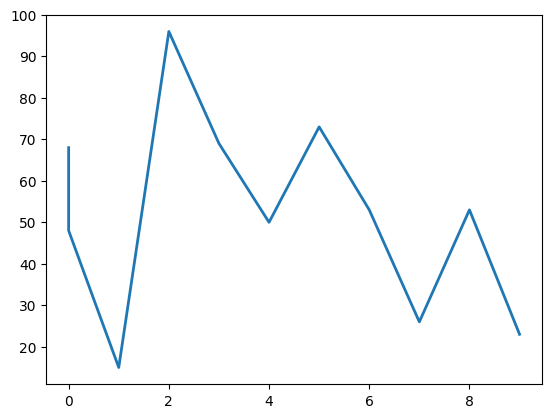

In [20]:
class RandomNumberGenerator:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.x_data, self.y_data = [], []
        self.line, = self.ax.plot([], [], lw=2)
        self.frames = np.arange(0, 10)
        self.animation = FuncAnimation(self.fig, self.update, frames=self.frames, interval=1000)
        self.save_gif()

    def update(self, frame):
        random_number = random.randint(0, 100)
        self.x_data.append(frame)
        self.y_data.append(random_number)
        self.line.set_data(self.x_data, self.y_data)
        self.ax.relim()
        self.ax.autoscale_view()
        return self.line,

    def save_gif(self):
        images = []
        for frame in self.frames:
            self.update(frame)
            self.fig.canvas.draw()
            image = np.frombuffer(self.fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(self.fig.canvas.get_width_height()[::-1] + (3,))
            images.append(image)
        images = [PILImage.fromarray(image) for image in images]
        images[0].save('random_number_animation.gif', save_all=True, append_images=images[1:], optimize=False, duration=1000)

    def show_graph(self):
        return Image(filename='random_number_animation.gif')

if __name__ == "__main__":
    rng = RandomNumberGenerator()
    rng.show_graph()